# Introduccion


Primer paso para trabajar con imagenes es importar los paquetes que usamos.

In [1]:
import os
#paquete que nos permite trabjar en el sistema operativo con archivos y carpetas, crear un path, ...

import matplotlib.pylab as plt
# paquete que nos permite plotear

from astropy.io import fits 
# permite leer los fits files, formate del archivo donde estan guardados los imagenes.

%matplotlib inline

In [2]:
#Parametros para plotear:

from matplotlib import rcParams
#rcParams["savefig.dpi"] = 300
#rcParams["figure.dpi"] = 300
rcParams["figure.figsize"] = (15, 7)
rcParams["font.size"] = 8

In [3]:
# Ajustar el valor de este variable !!!
datapath = '/home/mrabus/DECam_data/'

In [4]:
# el nombre de la imagen que queremos leer.
fitsimage = 'c4d_210418_025650_ori.fits.fz'

Si queremos obtener informacion sobre un paquete existe una funcion muy util.

In [6]:
help(fits)

Help on package astropy.io.fits in astropy.io:

NAME
    astropy.io.fits

DESCRIPTION
    A package for reading and writing FITS files and manipulating their
    contents.
    
    A module for reading and writing Flexible Image Transport System
    (FITS) files.  This file format was endorsed by the International
    Astronomical Union in 1999 and mandated by NASA as the standard format
    for storing high energy astrophysics data.  For details of the FITS
    standard, see the NASA/Science Office of Standards and Technology
    publication, NOST 100-2.0.

PACKAGE CONTENTS
    _utils
    card
    column
    compression
    connect
    convenience
    diff
    file
    fitsrec
    fitstime
    hdu (package)
    header
    scripts (package)
    setup_package
    tests (package)
    util
    verify

CLASSES
    astropy.config.configuration.ConfigNamespace(builtins.object)
        Conf
    astropy.io.fits.hdu.base.ExtensionHDU(astropy.io.fits.hdu.base._ValidHDU)
        astropy.io.fits.h

Ahora vamos a leer el archivo fits y imprimir sus datos generales.


In [7]:
fitshdu = fits.open( os.path.join(datapath,fitsimage) )

In [8]:
fitshdu.info()

Filename: /home/mrabus/DECam_data/c4d_210418_025650_ori.fits.fz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     150   ()      
  1  S1            1 CompImageHDU    102   (2160, 4146)   int16   
  2  S2            1 CompImageHDU    102   (2160, 4146)   int16   
  3  S3            1 CompImageHDU    102   (2160, 4146)   int16   
  4  N1            1 CompImageHDU    102   (2160, 4146)   int16   
  5  N2            1 CompImageHDU    102   (2160, 4146)   int16   
  6  N3            1 CompImageHDU    102   (2160, 4146)   int16   
  7  S8            1 CompImageHDU    102   (2160, 4146)   int16   
  8  S9            1 CompImageHDU    102   (2160, 4146)   int16   
  9  S14           1 CompImageHDU    102   (2160, 4146)   int16   
 10  S15           1 CompImageHDU    102   (2160, 4146)   int16   
 11  S20           1 CompImageHDU    102   (2160, 4146)   int16   
 12  S25           1 CompImageHDU    102   (2160, 4146)   int16   
 13  N8            

Veamos que un fits tiene diferentes unidades, que llaman HDU ("Header Data Units"). La unidad 0 tiene generalmente solo una cabecera con informacion de todos los chips.
Despues de la unidad 0, cada otra unidad tienen una cabecera mas sus datos correspondientes.

![Header](markdown-img/Fitsfile_schematic.gif)


In [9]:
header0 = fits.getheader( os.path.join(datapath,fitsimage), ext=0 )

In [10]:
header0

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
NEXTEND =                   70 / Number of extensions                           
PROCTYPE= 'raw     '           / Data processing level                          
PRODTYPE= 'image   '           / Data product type                              
DETSIZE = '[1:29400,1:29050]'  / Detector size                                  
PIXSCAL1=                 0.27 / [arcsec/pixel] Pixel scale, axis 1             
PIXSCAL2=                 0.27 / [arcsec/pixel] Pixel scale, axis 2             
FILENAME= 'DECam_00986163.fits' / Filename                                      
OBS-LONG=    70.81489000000001 / [deg] Observatory east longitude               
TELESCOP= 'CTIO 4.0-m telesc

Ahora vamos a revisar la unidad 4, empezando con la cabecera.

In [ ]:
header4 = fits.getheader( os.path.join(datapath,fitsimage), ext=8 )

In [ ]:
header4

Notamos que la cabecera de la unidad 4 es diferente. Porque es mas especifico para la ccd 4.

In [5]:
ccd4 = fits.getdata( os.path.join(datapath,fitsimage), ext=5 )

In [6]:
ccd4

array([[18182,  8245,  7660, ...,  6713,  6346, 17029],
       [ 3713,  3336,  3024, ...,  2329,  2627,  2998],
       [ 3658,  3283,  2971, ...,  2285,  2588,  2954],
       ...,
       [ 3465,  3086,  2778, ...,  2126,  2422,  2793],
       [ 3464,  3087,  2779, ...,  2124,  2423,  2794],
       [ 3464,  3085,  2777, ...,  2123,  2421,  2795]], dtype=uint16)

Los datos es simplement un array con valores.
![CCD](markdown-img/CCD-architecture.png)

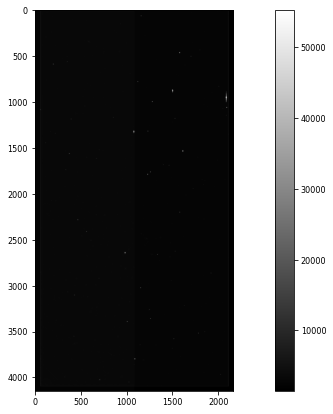

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
image1 = ax.imshow(ccd4, cmap='gray') #cmap='gray' significa blanco y negro
fig.colorbar(image1)

En el siguiente paso hacemos un zoom a una region. Un zoom significa simplemente que solo hacemos un plot de parte del array. En el caso abajo en x desde 1500 hasta 1700 e y desde 1500 hasta 1700.

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
image2 = ax.imshow(ccd4[1700:2000,1800:2000], cmap='gray') #cmap='gray' significa blanco y negro
fig.colorbar(image2)

Ahora mejoramos la vizualicioncion un poco. Igual como en la tele o monitor hay ajustes como el brillo y contraste. Lo mismo podemos hacer al plotear los imagenes. Existen diferentes intervalos para normaliza y visualizar una imagen:


In [ ]:
# importamos los paquetes que hacen estos calculos:
from astropy.visualization import ImageNormalize
from astropy.visualization import simple_norm, MinMaxInterval, PercentileInterval, ZScaleInterval


In [ ]:
interval = ZScaleInterval()
norm = ImageNormalize(ccd4, interval=ZScaleInterval())

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plot3 = ax.imshow(ccd4, cmap='gray', origin='lower', norm=norm,)
fig.colorbar(plot3)

Ahora se ve la imagen con mucho mas detalle.

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plot4 = ax.imshow(ccd4[2200:2800,1000:1500], cmap='gray', origin='lower', norm=norm,)
fig.colorbar(plot4)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plot5 = ax.imshow(ccd4[2600:2700,1300:1400], cmap='gray', origin='lower', norm=norm,)
fig.colorbar(plot5)
ax.hlines(y=80, xmin=0, xmax=99, linewidth=1, color='r')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plot5 = ax.plot(ccd4[2658,1300:1400], 'r')